# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ahmad Yudistira
- **Email:** m312d4ky2489@bangkit.academy
- **ID Dicoding:** yudistira280201

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Menentukan Pertanyaan Bisnis

- Apakah terdapat tren jangka panjang dalam jumlah peminjaman sepeda selama dua tahun terakhir?
- Apakah terdapat perbedaan dalam pola peminjaman sepeda antara hari kerja dan akhir pekan?


## Import Semua Packages/Library yang Digunakan

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

### Load tabel day

In [70]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Load tabel hour

In [71]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

### Menilai Day_df

Cek type data  day_df

In [72]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Cek missing values

In [73]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

cek duplicate data

In [74]:
print("Jumlah duplikasi data: ", day_df.duplicated().sum())

Jumlah duplikasi data:  0


cek statistik

In [75]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Menilai Hour_df

Cek info Hour_df

In [76]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan hasil diatas, terdapat 1 tipe data yang kolomnya tidak sesuai. Data yang perlu harus yaitu: dteday -> datetime

Cek missing value

In [77]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Cek duplikasi data

In [78]:
print("Jumlah duplikasi data: ", hour_df.duplicated().sum())

Jumlah duplikasi data:  0


Cek nilai statistik

In [79]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

1. Menghapus tabel yang tidak perlu, Alasannya karena kita tidak relevan dengan pertanyaan bisnis yang sudah kita tetapkan, dan juga sebenarnya tabel hr dan day itu bedanya hanya di kolom hrnya saja, selebihnya sama semua.

In [80]:
del hour_df

2. Menghapus kolom yang tidak digunakan karena tidak relevan dengan pertanyaan

In [81]:
drop_col = ['instant', 'hum', 'windspeed']

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,82,1518,1600


3. Mengubah judul kolom agar mudah dipahami

In [82]:
# Mengubah judul kolom
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,82,1518,1600


In [83]:
# Mengubah angka menjadi keterangan
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weather_cond'] = day_df['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [84]:
# Mengubah tipe data ke datetime
day_df['dateday'] = pd.to_datetime(day_df.dateday)

# Mengubaha tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_cond'] = day_df.weather_cond.astype('category')

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,casual,registered,count
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,82,1518,1600


In [85]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dateday       731 non-null    datetime64[ns]
 1   season        731 non-null    category      
 2   year          731 non-null    category      
 3   month         731 non-null    category      
 4   holiday       731 non-null    category      
 5   weekday       731 non-null    category      
 6   workingday    731 non-null    category      
 7   weather_cond  731 non-null    category      
 8   temp          731 non-null    float64       
 9   atemp         731 non-null    float64       
 10  casual        731 non-null    int64         
 11  registered    731 non-null    int64         
 12  count         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(2), int64(3)
memory usage: 40.8 KB


## Exploratory Data Analysis (EDA)

### Explorasi data day_df

1. Mengelompokkan penyewa sepeda baik casual maupun registered berdasarkan bulan

In [86]:
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

Dari hasil di atas, dapat ditarik kesimpulan bahwa bulan dengan jumlah peminjaman sepeda rata-rata tertinggi dan total peminjaman terbanyak adalah bulan Juni. Sebaliknya, bulan dengan rata-rata peminjaman sepeda terendah dan total peminjaman terkecil adalah bulan Januari.

2. Mengelompokkan penyewa sepeda baik casual maupun registered berdasarkan kondisi cuaca

In [87]:
day_df.groupby(by='weather_cond').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
                      max  min         mean      sum
weather_cond                                        
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

Dari data tersebut, dapat disimpulkan bahwa pengguna sepeda cenderung menyewa pada hari-hari dengan cuaca cerah atau sebagian berawan. Permintaan penyewaan sepeda menurun saat cuaca buruk, terutama saat turun salju atau cuaca sangat buruk.

3. Mengelompokkan penyewa sepeda baik casual maupun registered berdasarkan holiday

In [88]:
day_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

Berdasarkan hasil tersebut, dapat disimpulkan bahwa pengguna sepeda lebih memilih untuk menyewa sepeda pada hari kerja daripada saat hari libur.

4. Memandingkan penyewa sepeda pada saat weekday dengan weekend

In [89]:
day_df.groupby(by='weekday').agg({
    'count':['max','min','mean']
})

count                   
          max   min         mean
weekday                         
Fri      8362  1167  4690.288462
Mon      7525    22  4338.123810
Sat      8714   627  4550.542857
Sun      8227   605  4228.828571
Thu      7804   431  4667.259615
Tue      7767   683  4510.663462
Wed      8173   441  4548.538462

Dari data yang tersebut, dapat disimpulkan bahwa urutan rata-rata jumlah penyewa dari yang tertinggi ke yang terendah adalah sebagai berikut: Jumat (Fri), Kamis (Thu), Sabtu (Sat), Rabu (Wed), Selasa (Tue), Senin (Mon), dan Minggu (Sun).

5. Mengelompokkan penyewa sepeda baik casual maupun registered berdasarkan workingday

In [90]:
day_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean']
})

count                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

Berdasarkan hasil tersebut, jumlah penyewaan sepeda terbesar jatuh kepada workingday atau hari kerja dibandingkan dengan hari non-workingday.

6. Mengelompokkan penyewa sepeda baik casual maupun registered berdasarkan musim

In [44]:
day_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

Dari hasil diatas, terlihat bahwa baik penyewa sepeda Casual maupun Registered lebih cenderung menyewa sepeda saat musim gugur (Fall), yang dapat dilihat dari rata-rata penggunaan yang tinggi pada saat itu. Sebaliknya, jumlah penyewaan terendah terjadi pada musim semi (Spring), dengan rata-rata penggunaan yang paling rendah.

7. Hubungan antara penyewa casual, registered, dan count

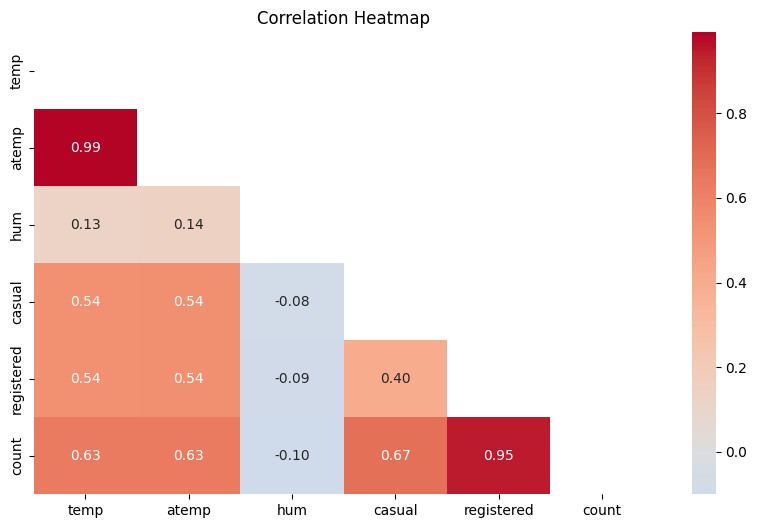

In [46]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Berdasarkan hasil diatas, dapat disimpulkan:
- Suhu aktual (temp) dan suhu yang dirasakan (atemp) memiliki korelasi yang sangat tinggi, yaitu 0.99.
- Tingkat kelembaban udara (hum) menunjukkan korelasi yang rendah dengan suhu aktual dan suhu yang dirasakan, dengan koefisien korelasi masing-masing sebesar 0.13 dan 0.14.
- Jumlah penyewa casual menunjukkan korelasi cukup kuat dengan suhu aktual dan suhu yang dirasakan, dengan koefisien korelasi sebesar 0.54, dan sedikit korelasi negatif dengan tingkat kelembaban udara, sebesar -0.08.
- Jumlah penyewa yang terdaftar (registered) memiliki pola korelasi yang serupa dengan penyewa casual, dan menunjukkan korelasi moderat dengan penyewa casual, yaitu sebesar 0.40.
- Total jumlah penyewaan (count) memiliki korelasi yang kuat dengan suhu aktual, suhu yang dirasakan, jumlah penyewa casual, dan jumlah penyewa yang terdaftar, masing-masing dengan koefisien korelasi sebesar 0.63, 0.63, 0.67, dan 0.95, dan menunjukkan sedikit korelasi negatif dengan tingkat kelembaban udara, sebesar -0.10.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Apakah terdapat tren jangka panjang dalam jumlah peminjaman sepeda selama dua tahun terakhir?

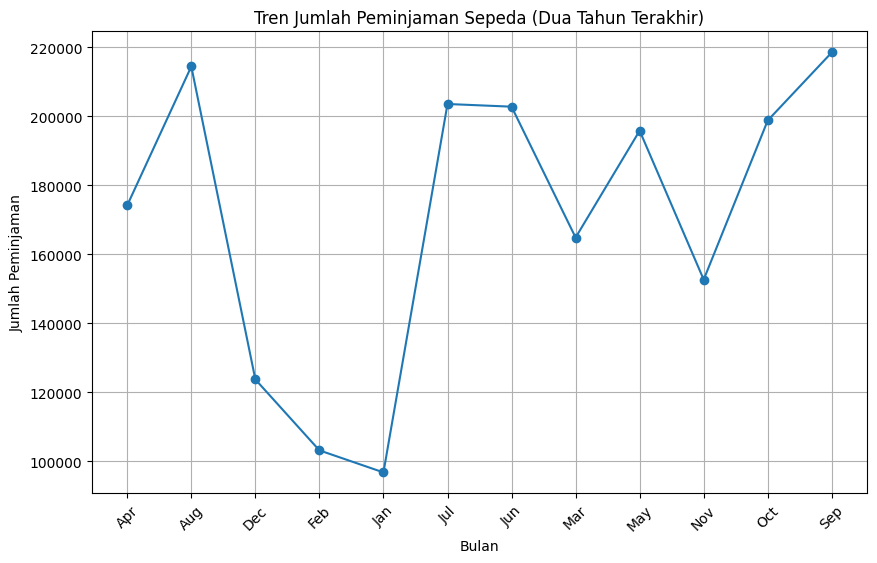

In [47]:
# Filter data untuk dua tahun terakhir
two_years_data = day_df[day_df['year'] == 1]

# Hitung total peminjaman sepeda setiap bulan
monthly_rentals = two_years_data.groupby('month')['count'].sum()

# Visualisasikan tren peminjaman sepeda selama dua tahun terakhir
plt.figure(figsize=(10, 6))
plt.plot(monthly_rentals.index, monthly_rentals.values, marker='o')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman')
plt.title('Tren Jumlah Peminjaman Sepeda (Dua Tahun Terakhir)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Pertanyaan 2:

Apakah terdapat perbedaan dalam pola peminjaman sepeda antara hari kerja dan akhir pekan?

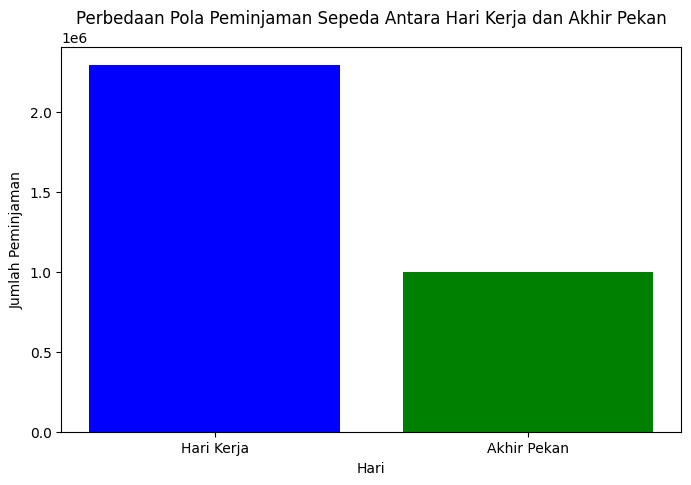

In [48]:
# Hitung total peminjaman sepeda untuk setiap hari kerja dan akhir pekan
weekday_rentals = day_df[day_df['workingday'] == 1]['count'].sum()
weekend_rentals = day_df[day_df['workingday'] == 0]['count'].sum()

# Visualisasikan perbedaan pola peminjaman sepeda antara hari kerja dan akhir pekan
plt.figure(figsize=(8, 5))
plt.bar(['Hari Kerja', 'Akhir Pekan'], [weekday_rentals, weekend_rentals], color=['blue', 'green'])
plt.xlabel('Hari')
plt.ylabel('Jumlah Peminjaman')
plt.title('Perbedaan Pola Peminjaman Sepeda Antara Hari Kerja dan Akhir Pekan')
plt.show()


## Conclusion

- Conclution pertanyaan 1
Berdasarkan analisis tren jumlah peminjaman sepeda selama dua tahun terakhir, kita dapat melihat apakah ada peningkatan atau penurunan secara keseluruhan dari bulan ke bulan selama periode tersebut. Jika ada tren naik atau turun yang signifikan, ini bisa mengindikasikan faktor-faktor tertentu yang memengaruhi permintaan peminjaman sepeda selama periode waktu tersebut. Terlihat bahwa terjadi peningkatan peminjam sepeda pada bulan agustus, juli, mei, oktober, dan september. Jumlah peminjam terbanyak pada bulan september, yaitu sebesar 220.000 dan yang terkecil di bulan januari yaitu di bawah 100.000
- Conclution pertanyaan 2
Analisis perbedaan pola peminjaman sepeda antara hari kerja dan akhir pekan dapat memberikan wawasan tentang perilaku pengguna sepeda.
Jika terdapat perbedaan yang signifikan antara jumlah peminjaman sepeda pada hari kerja dan akhir pekan, ini bisa menunjukkan pola penggunaan sepeda yang berbeda-beda tergantung pada hari dalam seminggu. Berdasarkan hasil grafik tersebut, dapat dilihat bahwa pola peminjaman sepeda antara hari kerja dan akhir pekan lebih tinggi pada hari kerja